<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 04 분류



##01 분류의 개요

* 지도학습: 레이블 즉 면시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
  * 지도학습의 대표적인 유형 분류: 학습데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측
  * 종류: 나이브 베이즈/로지스틱 회귀/ 결정트리/ 벡터머신/ 최소 근접 알고리즘/ 심층 연결 기반 신경망/ 앙상블
* 앙상블: 정형 데이터의 예측 분석 영역에서 높은 예측 성능
  * 방식
  1. 배깅: 랜덤 포레스트
  2. 부스팅: 그래디언트 부스팅/ XgBoost

* 앙상블의 기본 알고리즘: 결정 트리
  *데이터의 스케일링이나 정규화의 영항이 적음
  *복잡한 규칙 구조와 과적합이 단점(앙상블에선 장점)

##02 결정트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

규칙 노드로 표시된 노드는 규칙 조건, 리프 노드로 표시된 노드는 결정된 클래스 값

규칙이 많아지면 과적합으로 이어짐
> 트리의 깊이가 깊어질수록 결정 트리의 예측 성능 저하되므로 가능한 적은 결정 노드로 높은 예측 정확도를 가져야함

따라서 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야함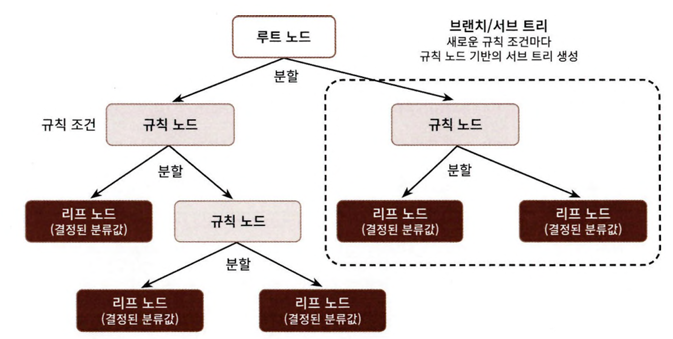

균일도가 높을 수록 데이터를 구분하는데 필요한 정보의 양이 적음
> 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

* 균일도 측정 방법
1. 정보 이득: 엔트로피는 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여있으면 엔트로피가 높음
  > 정보 이득 지수= 1-엔트로피 지수, 즉 정보 이득이 높을수록 균일도가 높음
2. 지니계수: 0이 가장 평등, 1로 갈수록 불평등
  > 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석

###결정 트리 모델의 특징



* 장점:
  * 균일도라는 룰을 기반으로 해 쉽고 직관적임
  * 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고 각 피처의 스케일링 등의 전처리 작업 필요 없음

* 단점:과적합으로 정확도가 떨어짐
> 모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 많음에도 결정트리는 계속해서 조건을 추가해 트리 깊이가 커짐

  > **트리의 크기를 사전에 제한**

### 결정 트리 파라미터

사이킷런: DecisionTreeClassifier, DecisionTreeRegressor클래스 제공

* min_samples_spllit: 노드를 분할하기 위한 최소한의 샘플 데이터 수/ 디폴트:2
* min_samples_leaf: 분할이 될 경우 왼쪽과 오른쪽 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수/ 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우엔 작게 설정 필요
* max_features: 최적의 분할을 위해 고려한 최대 피처 개수/디폴트는 None 즉 모든 피처 사용/ int형으로 지정 시 대상 피처의 개수, float 형으로 지정시 대상 피처의 퍼센트
  * sqrt(또는 auto): 전체 피처 개수의 루트만큼
  * log: log2(전체 피처 개수)
  * None: 전체 피처 선정
* max_depth: 트리의 최대 깊이/디폴트는 None 즉 완벽한 결정값이 될때 까지 혹은 min_samples_split보다 작아질 때까지
* max_leaf_nodes:말단 노드의 최대 개수

###결정 트리 모델의 시각화

Graphviz 설치###결정 트리 모델의 시각화

Graphviz 설치

In [1]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [12]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [13]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

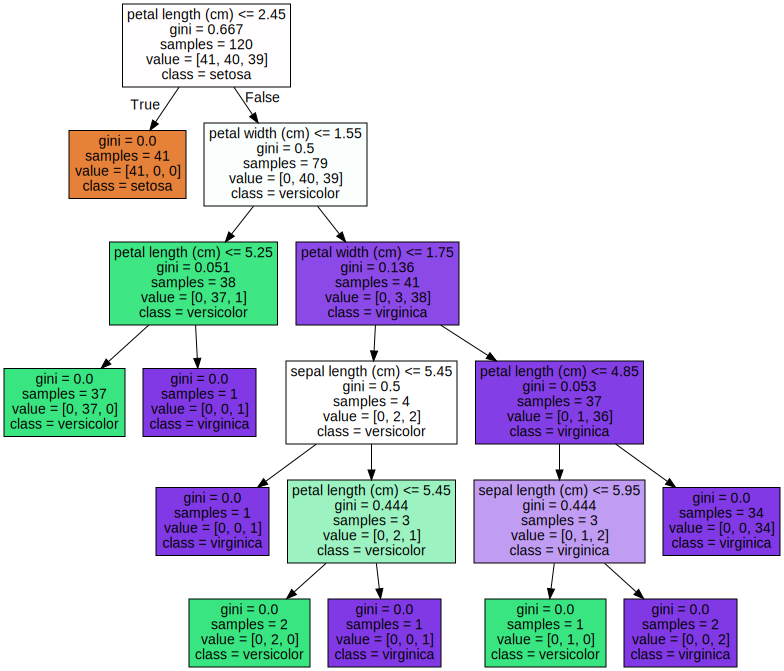

In [14]:
import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

더이상 자식 노드가 없는 노드는 리프 노드
* 피처의 조건이 있는 노드는 규칙 노드
* gini는 지니 계수
* samples는 현 규칙에 해당하는 데이터 건수
* value=[]는 클래스 값 기반의 데이터 건수
* class=setosa는 하위 노드를 가질 경우 setosa의 개수가 가장 많다는 의미
* 각 노드의 색: 레이블 값/ 색이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미




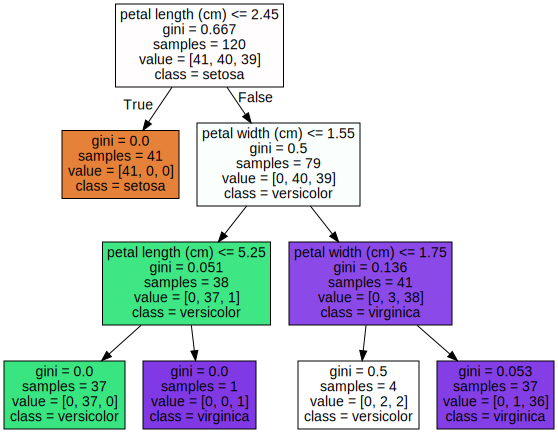

In [6]:
#max_depth=3
dt_clf=DecisionTreeClassifier(random_state=156,max_depth=3)

iris_data=load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)
import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

더 간결한 트리

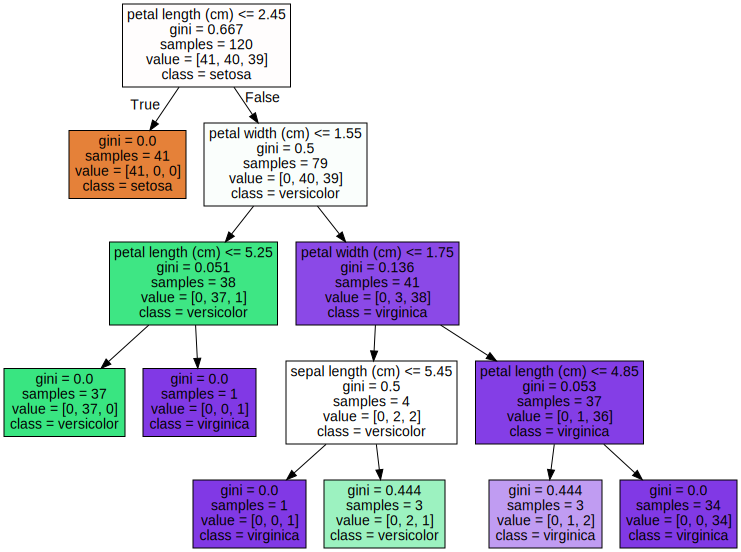

In [8]:
#min_samples_split=4
dt_clf=DecisionTreeClassifier(random_state=156,min_samples_split=4)

iris_data=load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)
import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

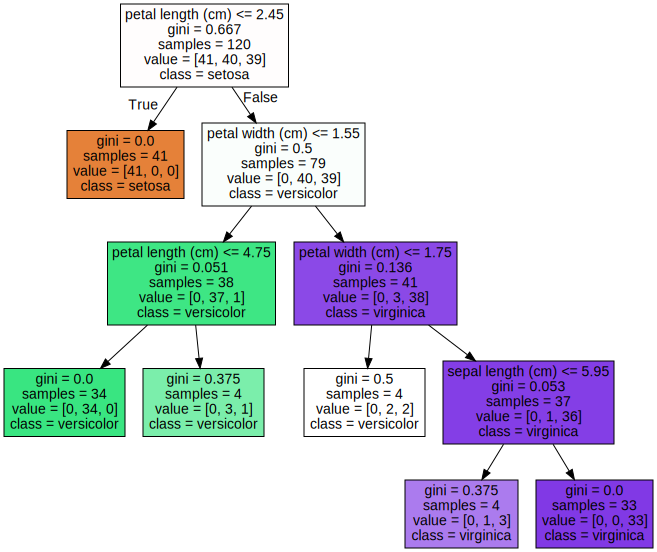

In [9]:
#min_samples_leaf=4
dt_clf=DecisionTreeClassifier(random_state=156,min_samples_leaf=4)

iris_data=load_iris()
X_train, X_test,y_train, y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train,y_train)
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)
import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

자식 노드가 모두 조건을 만족시켜야 하므로 어려움

* feature_importances_: ndarry 형태로 피처의 중요도를 순서대로 할당/ 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

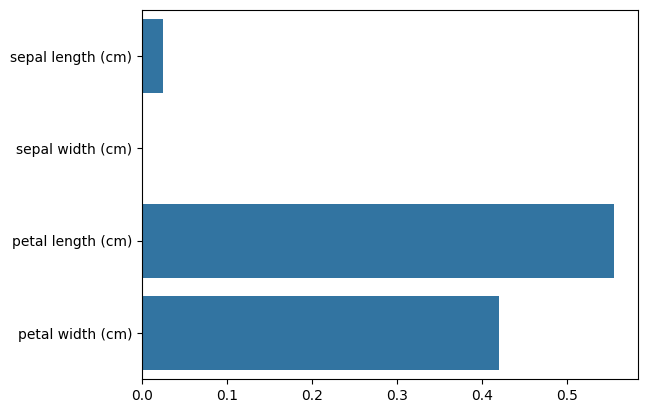

In [16]:
from ast import increment_lineno
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}: {1:.3f}'.format(name, value))
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

### 결정 트리 과적합

과적합 문제 시각화

테스트 데이터 쉽게 만드는 make_classification()사용

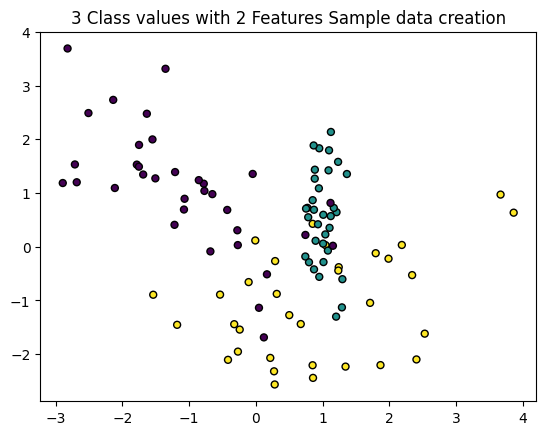

In [18]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,
                                         n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolors='k')


어떠한 결정 기준으로 분할하면서 데이터 분류하는 확인

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


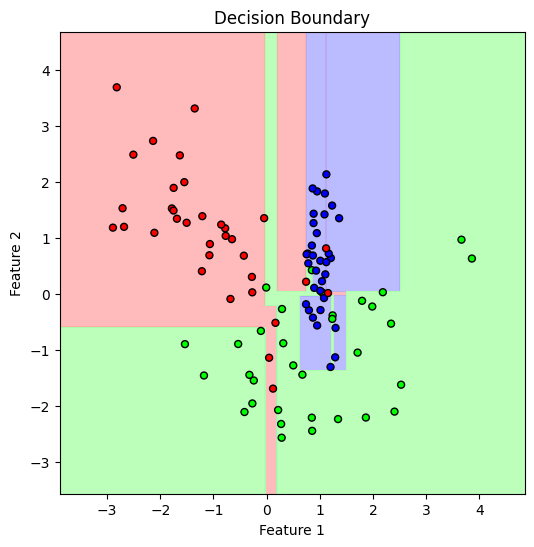

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

이상치 데이터까지 분류하기 위해 결정 기준 경계가 매우 많아짐
> 과적합으로 예측 정확도 떨어짐

min_samples_leaf=6으로 생성 조건을 제약한 결정 경계 시각화

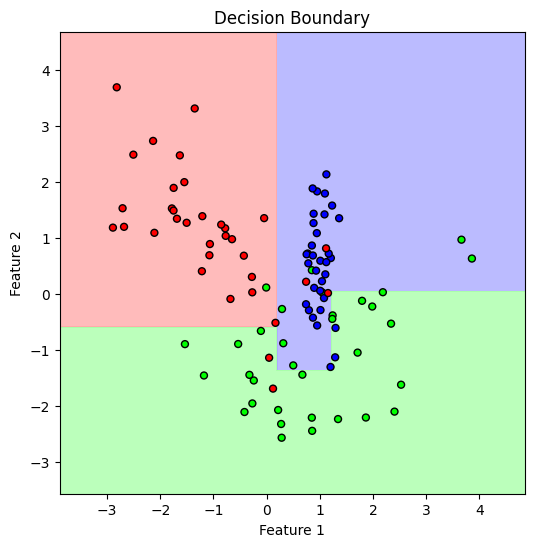

In [24]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None, names=['column_index','column_name'])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3629966155.py:5: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None, names=['column_index','column_name'])


In [2]:
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


중복된 피처명 존재해 DF로드하면 오류 발생

중복된 피처명 얼마나 있는지 확인

In [3]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중복된 피처명에 대해 원본 피처명에 _1또는 _2 추가로 부여하는 함수 만들기


In [13]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                                               columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                          'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                           if x[1]>0 else x[0],axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd

def get_human_dataset():
  feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA/week5/features.txt',sep='\s+',
                              header=None, names=['column_index','column_name'])
  new_feature_name_df=get_new_feature_name_df(feature_name_df)
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()
  X_train=pd.read_csv('/content/drive/MyDrive/ESAA/week5/train/X_train.txt',sep='\s+',names=feature_name)
  X_test=pd.read_csv('/content/drive/MyDrive/ESAA/week5/test/X_test.txt',sep='\s+',names=feature_name)

  y_train=pd.read_csv('/content/drive/MyDrive/ESAA/week5/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test=pd.read_csv('/content/drive/MyDrive/ESAA/week5/test/y_test.txt',sep='\s+',header=None,names=['action'])
  return X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test=get_human_dataset()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2281815713.py:4: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA/week5/features.txt',sep='\s+',
/tmp/ipython-input-2281815713.py:8: SyntaxWarning: invalid escape sequence '\s'
  X_train=pd.read_csv('/content/drive/MyDrive/ESAA/week5/train/X_train.txt',sep='\s+',names=feature_name)
/tmp/ipython-input-2281815713.py:9: SyntaxWarning: invalid escape sequence '\s'
  X_test=pd.read_csv('/content/drive/MyDrive/ESAA/week5/test

In [16]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


7352개 레코드 561개의 피처, 피처는 모두 float형으로 별도의 카테고리 인코딩 필요 없음

In [17]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [18]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


고르게 분포되어있음

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [20]:
#max_depth변화
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [21]:
cv_result_df=pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


8넘어가면서부터 과적합

테스트 데이터세트에 대해서 정확도 측정

In [23]:
max_depths=[6,8,10,12,16,20,24]
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth, min_samples_split=16,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0}정확도: {1:.4f}'.format(depth, accuracy))


max_depth=6정확도: 0.8551
max_depth=8정확도: 0.8717
max_depth=10정확도: 0.8599
max_depth=12정확도: 0.8571
max_depth=16정확도: 0.8599
max_depth=20정확도: 0.8565
max_depth=24정확도: 0.8565


max_depth와 min_sample_split함께 변경

In [25]:
params={
    'max_depth':[6,12,16,20],
    'min_samples_split':[16,24]
}
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8494
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16, 'min_samples_split': 24}


In [26]:
best_df_clf=grid_cv.best_estimator_ # 최적 하이퍼 파라미터로 학습된 객체
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8507


중요도 높은 순으로 Top20 피처 막대그래프

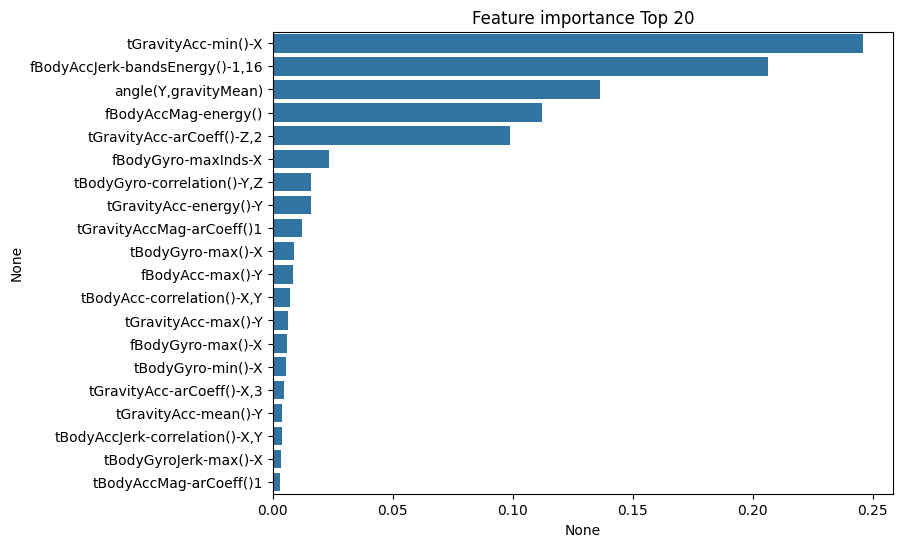

In [28]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()